# Classification - full_body

In [19]:
# multi-class classification

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os


cwd = os.path.abspath('./full_body_data/2017_2018') 
files = os.listdir(cwd) 

df = pd.DataFrame()
for file in files:
    if file.endswith('.xlsx'):
        df = df.append(pd.read_excel(file), ignore_index=True) 

x = df.iloc[:,0:51].values
y = df.iloc[:, 52].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# fit model
#clf = OneVsRestClassifier(LogisticRegression(random_state=0))
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance'))
#clf = OneVsRestClassifier(RandomForestClassifier(max_depth=5, random_state=0))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 12

for i in range(n_class):
    #print(pred_prob[:,i])
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

auc_test = roc_auc_score(y_test, pred_prob, multi_class="ovo", average='weighted')
print(auc_test)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 4 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 7 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 8 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 12 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='pink', label='Class 13 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='gray', label='Class 17 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='olive', label='Class 31 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='cyan', label='Class 40 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='magenta', label='Class 48 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='yellow', label='Class 77 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlim(0, 1.6)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

FileNotFoundError: [Errno 2] No such file or directory: 'full_body_2017_v1.0.xlsx'

0.6667413474298173


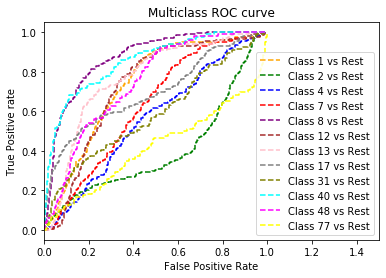

In [6]:
# multi-class classification

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd



training_dataset = pd.read_excel('/media/acw441/e2d0fc25-de67-4c3b-8424-7e9d2cff61b2/pycharm_projects/re_id_paper_01/experimentation_01/full_body_2017/full_body_2017_v1.0.xlsx')

X_train = training_dataset.iloc[:,0:51].values
y_train = training_dataset.iloc[:, 52].values
#print(X_train.shape)

test_dataset = pd.read_excel('/media/acw441/e2d0fc25-de67-4c3b-8424-7e9d2cff61b2/pycharm_projects/re_id_paper_01/experimentation_01/carrying_bag_or_hat_2017/full_body_2017_v1.0.xlsx')

X_test = test_dataset.iloc[:,0:51].values
y_test = test_dataset.iloc[:, 52].values
#print(y_test.shape)


# fit model
#clf = OneVsRestClassifier(LogisticRegression())
#clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=4))
clf = OneVsRestClassifier(RandomForestClassifier(max_depth=5, random_state=0))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 12

for i in range(n_class):
    #print(pred_prob[:,i])
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

auc_test = roc_auc_score(y_test, pred_prob, multi_class="ovo", average='macro')
print(auc_test)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 4 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 7 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 8 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 12 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='pink', label='Class 13 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='gray', label='Class 17 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='olive', label='Class 31 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='cyan', label='Class 40 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='magenta', label='Class 48 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='yellow', label='Class 77 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlim(0, 1.5)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

0.6531975987143859


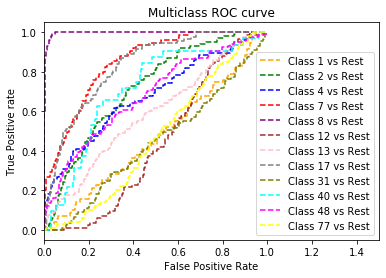

In [8]:
# multi-class classification

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd



training_dataset = pd.read_excel('/media/acw441/e2d0fc25-de67-4c3b-8424-7e9d2cff61b2/pycharm_projects/re_id_paper_01/experimentation_01/full_body_2017/full_body_2017_v1.0.xlsx')

X_train = training_dataset.iloc[:,0:51].values
y_train = training_dataset.iloc[:, 52].values
#print(X_train.shape)

test_dataset = pd.read_excel('/media/acw441/e2d0fc25-de67-4c3b-8424-7e9d2cff61b2/pycharm_projects/re_id_paper_01/experimentation_01/changing_clothes_2018/full_body_2018_v1.0.xlsx')

X_test = test_dataset.iloc[:,0:51].values
y_test = test_dataset.iloc[:, 52].values
#print(y_test.shape)


# fit model
#clf = OneVsRestClassifier(LogisticRegression())
#clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=4))
clf = OneVsRestClassifier(RandomForestClassifier(max_depth=5, random_state=0))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 12

for i in range(n_class):
    #print(pred_prob[:,i])
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

auc_test = roc_auc_score(y_test, pred_prob, multi_class="ovo", average='macro')
print(auc_test)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 4 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 7 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 8 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 12 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='pink', label='Class 13 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='gray', label='Class 17 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='olive', label='Class 31 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='cyan', label='Class 40 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='magenta', label='Class 48 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='yellow', label='Class 77 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlim(0, 1.5)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

# Classification - upper_half

0.7451075057096194


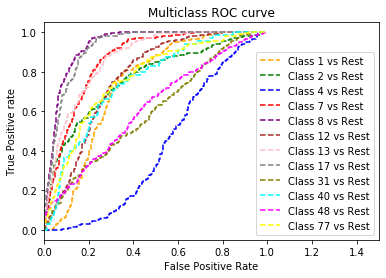

In [10]:
# multi-class classification

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd



training_dataset = pd.read_excel('/media/acw441/e2d0fc25-de67-4c3b-8424-7e9d2cff61b2/pycharm_projects/re_id_paper_01/experimentation_01/full_body_2017/upper_half_2017_v1.0.xlsx')

X_train = training_dataset.iloc[:,0:51].values
y_train = training_dataset.iloc[:, 52].values
#print(X_train.shape)

test_dataset = pd.read_excel('/media/acw441/e2d0fc25-de67-4c3b-8424-7e9d2cff61b2/pycharm_projects/re_id_paper_01/experimentation_01/full_body_2018/upper_half_2018_v1.0.xlsx')

X_test = test_dataset.iloc[:,0:51].values
y_test = test_dataset.iloc[:, 52].values
#print(y_test.shape)


# fit model
clf = OneVsRestClassifier(LogisticRegression(random_state=0))
#clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=4))
#clf = OneVsRestClassifier(RandomForestClassifier(max_depth=5, random_state=0))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 12

for i in range(n_class):
    #print(pred_prob[:,i])
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

auc_test = roc_auc_score(y_test, pred_prob, multi_class="ovo", average='weighted')
print(auc_test)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 4 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 7 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 8 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 12 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='pink', label='Class 13 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='gray', label='Class 17 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='olive', label='Class 31 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='cyan', label='Class 40 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='magenta', label='Class 48 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='yellow', label='Class 77 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlim(0, 1.5)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

0.6898354831192183


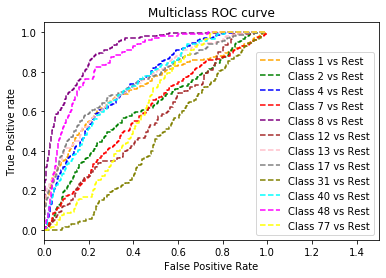

In [11]:
# multi-class classification

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd



training_dataset = pd.read_excel('/media/acw441/e2d0fc25-de67-4c3b-8424-7e9d2cff61b2/pycharm_projects/re_id_paper_01/experimentation_01/full_body_2017/upper_half_2017_v1.0.xlsx')

X_train = training_dataset.iloc[:,0:51].values
y_train = training_dataset.iloc[:, 52].values
#print(X_train.shape)

test_dataset = pd.read_excel('/media/acw441/e2d0fc25-de67-4c3b-8424-7e9d2cff61b2/pycharm_projects/re_id_paper_01/experimentation_01/carrying_bag_or_hat_2017/upper_half_2017_v1.0.xlsx')

X_test = test_dataset.iloc[:,0:51].values
y_test = test_dataset.iloc[:, 52].values
#print(y_test.shape)


# fit model
#clf = OneVsRestClassifier(LogisticRegression())
#clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=4))
clf = OneVsRestClassifier(RandomForestClassifier(max_depth=5, random_state=0))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 12

for i in range(n_class):
    #print(pred_prob[:,i])
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

auc_test = roc_auc_score(y_test, pred_prob, multi_class="ovo", average='macro')
print(auc_test)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 4 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 7 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 8 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 12 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='pink', label='Class 13 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='gray', label='Class 17 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='olive', label='Class 31 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='cyan', label='Class 40 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='magenta', label='Class 48 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='yellow', label='Class 77 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlim(0, 1.5)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

0.6418948843273351


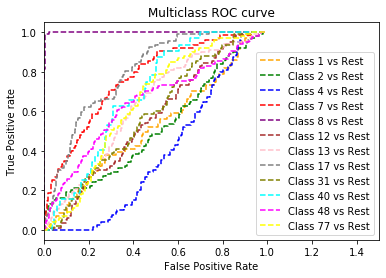

In [12]:
# multi-class classification

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd



training_dataset = pd.read_excel('/media/acw441/e2d0fc25-de67-4c3b-8424-7e9d2cff61b2/pycharm_projects/re_id_paper_01/experimentation_01/full_body_2017/upper_half_2017_v1.0.xlsx')

X_train = training_dataset.iloc[:,0:51].values
y_train = training_dataset.iloc[:, 52].values
#print(X_train.shape)

test_dataset = pd.read_excel('/media/acw441/e2d0fc25-de67-4c3b-8424-7e9d2cff61b2/pycharm_projects/re_id_paper_01/experimentation_01/changing_clothes_2018/upper_half_2018_v1.0.xlsx')

X_test = test_dataset.iloc[:,0:51].values
y_test = test_dataset.iloc[:, 52].values
#print(y_test.shape)


# fit model
#clf = OneVsRestClassifier(LogisticRegression())
#clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=4))
clf = OneVsRestClassifier(RandomForestClassifier(max_depth=5, random_state=0))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 12

for i in range(n_class):
    #print(pred_prob[:,i])
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

auc_test = roc_auc_score(y_test, pred_prob, multi_class="ovo", average='macro')
print(auc_test)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 4 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 7 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 8 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 12 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='pink', label='Class 13 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='gray', label='Class 17 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='olive', label='Class 31 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='cyan', label='Class 40 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='magenta', label='Class 48 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='yellow', label='Class 77 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlim(0, 1.5)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  